In [90]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import timedelta
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

# Analysis of Cycling Data

## Loading Data

The first dataset is an export of my ride data from [Strava](https://strava.com/), an online social 
network site for cycling and other sports.  This data is a log of every ride since the start of 2018
and contains summary data like the distance and average speed.  It was exported using 
the script `stravaget.py` which uses the stravalib module to read data. Some details of
the fields exported by that script can be seen in [the documentation for stravalib](https://pythonhosted.org/stravalib/api.html#stravalib.model.Activity). 

The exported data is a CSV file so that's easy to read, however the date information in the file is 
recorded in a different timezone (UTC) so we need to do a bit of conversion.  In reading the data I'm
setting the index of the data frame to be the datetime of the ride. 

In [91]:
strava = pd.read_csv('data/strava_export.csv', index_col='date', parse_dates=True)
strava.index = strava.index.tz_localize('UTC')
strava.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type
date,,,,,,,,,,
2018-01-02 20:47:51+00:00,100.6,21.0,73.8,False,15.2,94,316.00 m,10,73,Ride
2018-01-04 01:36:53+00:00,NaN,24.0,131.7,False,18.0,52,236.00 m,5,46,Ride
2018-01-04 02:56:00+00:00,83.1,25.0,13.8,False,0.0,3,0.00 m,2,2,Ride
2018-01-04 05:37:04+00:00,110.1,24.0,113.6,False,22.9,77,246.00 m,8,64,Ride
2018-01-05 19:22:46+00:00,110.9,20.0,147.7,True,58.4,189,676.00 m,12,144,Ride


The second dataset comes from an application called [GoldenCheetah](https://www.goldencheetah.org/) which provides
some analytics services over ride data.  This has some of the same fields but adds a lot of analysis of the 
power, speed and heart rate data in each ride.  This data overlaps with the Strava data but doesn't include all 
of the same rides. 

Again we create an index using the datetime for each ride, this time combining two columns in the data (date and time) 
and localising to Sydney so that the times match those for the Strava data. 

In [92]:
cheetah = pd.read_csv('data/cheetah.csv', skipinitialspace=True)
cheetah.index = pd.to_datetime(cheetah['date'] + ' ' + cheetah['time'])
cheetah.index = cheetah.index.tz_localize('Australia/Sydney')
cheetah.head()

,date,time,filename,axPower,aPower Relative Intensity,aBikeScore,Skiba aVI,aPower Response Index,aIsoPower,aIF,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,01/28/18,06:39:49,2018_01_28_06_39_49.json,202.211,0.75452,16.6520,1.31920,1.67755,223.621,0.83441,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-28 07:01:32+11:00,01/28/18,07:01:32,2018_01_28_07_01_32.json,226.039,0.84343,80.2669,1.21137,1.54250,246.185,0.91860,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-01 08:13:34+11:00,02/01/18,08:13:34,2018_02_01_08_13_34.json,0.000,0.00000,0.0000,0.00000,0.00000,0.000,0.00000,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-06 08:06:42+11:00,02/06/18,08:06:42,2018_02_06_08_06_42.json,221.672,0.82714,78.8866,1.35775,1.86002,254.409,0.94929,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 17:59:05+11:00,02/07/18,17:59:05,2018_02_07_17_59_05.json,218.211,0.81422,159.4590,1.47188,1.74658,233.780,0.87231,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


The GoldenCheetah data contains many many variables (columns) and I won't go into all of them here. Some
that are of particular interest for the analysis below are:

Here are definitions of some of the more important fields in the data. Capitalised fields come from the GoldenCheetah data
while lowercase_fields come from Strava. There are many cases where fields are duplicated and in this case the values
should be the same, although there is room for variation as the algorithm used to calculate them could be different
in each case. 

  * Duration - overall duration of the ride, should be same as elapsed_time
  * Time Moving - time spent moving (not resting or waiting at lights), should be the same as moving_time
  * Elevation Gain - metres climbed over the ride
  * Average Speed - over the ride
  * Average Power - average power in watts as measured by a power meter, relates to how much effort is being put in to the ride, should be the same as  * average_watts' from Strava
  * Nonzero Average Power - same as Average Power but excludes times when power is zero from the average
  * Average Heart Rate - should be the same as average_heartrate
  * Average Cadence - cadence is the rotations per minute of the pedals
  * Average Temp - temperature in the environment as measured by the bike computer (should be same as average_temp)
  * VAM - average ascent speed - speed up hills
  * Calories (HR) - Calorie expendature as estimated from heart rate data
  * 1 sec Peak Power - this and other  'Peak Power' measures give the maximum power output in the ride over this time period.  Will be higher for shorter periods. High values in short periods would come from a very 'punchy' ride with sprints for example.
  * 1 min Peak Hr - a similar measure relating to Heart Rate
  * NP - Normalised Power, a smoothed average power measurement, generally higher than Average Power 
  * TSS - Training Stress Score, a measure of how hard a ride this was
  * device_watts - True if the power (watts) measures were from a power meter, False if they were estimated
  * distance - distance travelled in Km
  * kudos - likes from other Strava users (social network)
  * workout_type - one of  'Race',  'Workout' or  'Ride'
  
  
Some of the GoldenCheetah parameters are defined [in thier documentation](https://github.com/GoldenCheetah/GoldenCheetah/wiki/UG_Glossary).  

## Your Tasks

Your first task is to combine these two data frames using the [`join` method of Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#joining-on-index).   The goal is to keep only those rows of data 
that appear in __both__ data frames so that we have complete data for every row.  

### Combined Data
The goal is to keep only those rows of data that appear in both data frames so that we have complete data for every row.

In [93]:
# Combined data that appear in both data
result = pd.concat([strava, cheetah], axis=1, join='inner')
result.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-28 07:01:32+11:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-01 08:13:34+11:00,109.8,19.0,143.0,False,26.3,649,612.00 m,6,113,Ride,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-06 08:06:42+11:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 17:59:05+11:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


In [94]:
# Showing the dimensional of the new combined data
result.shape

(243, 372)

## Required Analysis

1. Remove rides with no measured power (where device_watts is False) - these are commutes or MTB rides
* Look at the distributions of some key variables: time, distance, average speed, average power, TSS. Are they normally distributed? Skewed? 
* Explore the relationships between the following variables. Are any of them corrolated with each other (do they vary together in a predictable way)? Can you explain any relationships you observe?  
    * Distance
    * Moving Time
    * Average Speed
    * Heart Rate
    * Power (watts)
    * Normalised power (NP)
    * Training Stress Score
    * Elevation Gain
* We want to explore the differences between the three categories: `Race`, `Workout` and `Ride`.
    * Use scatter plots with different colours for each category to explore how these categories differ.  
    * Use histograms or box plots to visualise the different distributions of a variable for the three categories.
    * In both cases, experiment with different variables but only include those that are interesting in your final notebook (if none are interesting, show us a representative example).


## Challenge

* What leads to more `kudos`? Is there anything to indicate which rides are more popular? Explore the relationship between the main variables and kudos. Show a plot and comment on any relationship you observe. 

* Generate a plot that summarises the number of km ridden each month over the period of the data. Overlay this with the _sum_ of the Training Stress Score and the _average_ of the Average Speed to generate an overall summary of activity.

* Generate a similar graph but one that shows the activity over a given month, with the sum of the values for each day of the month shown.  So, if there are two rides on a given day, the graph should show the sum of the distances etc for these rides.

Hint: to generate these summary plots you need to use the [timeseries/date functionality](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) in Pandas to generate a new data frame containing the required data.  

__Note:__ once you have completed these steps you can remove this cell.  Use the text as a starting point for the documentation of your workflow and discussion of results.


### #1 Analysis - Device Watts Filtered
Remove rides with no measured power (where device_watts is False) - these are commutes or MTB rides.

Also removing rows that has missing data (NaN data)

In [95]:
# Remove rides with no measured power (where device_watts is False)
result_true = result[result['device_watts']==True]
# Remove rides with missing data
result_true = result_true.dropna()

### #2 Analysis - Distribution 
Look at the distributions of some key variables: time, distance, average speed, average power, TSS. Are they normally distributed? Skewed?

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


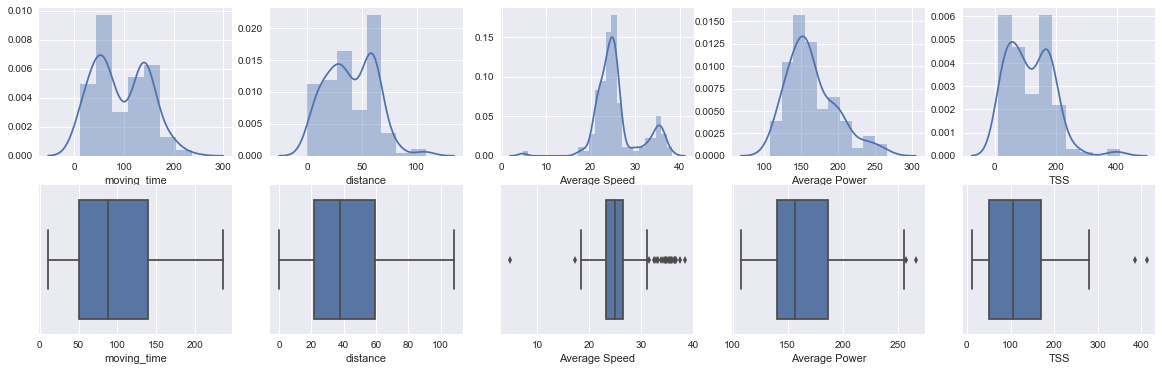

In [96]:
# Plotting the histogram and boxplo for time, distance, average speed, average power, TSS
f, axes = plt.subplots(2, 5,figsize=(20, 6))
sns.distplot(result_true['moving_time'], ax=axes[0,0])
sns.distplot(result_true['distance'], ax=axes[0,1])
sns.distplot(result_true['Average Speed'], ax=axes[0,2])
sns.distplot(result_true['Average Power'], ax=axes[0,3])
sns.distplot(result_true['TSS'], ax=axes[0,4])
sns.boxplot(result_true['moving_time'], ax=axes[1,0])
sns.boxplot(result_true['distance'], ax=axes[1,1])
sns.boxplot(result_true['Average Speed'], ax=axes[1,2])
sns.boxplot(result_true['Average Power'], ax=axes[1,3])
sns.boxplot(result_true['TSS'], ax=axes[1,4])

From the histogram and boxplot diagrams above, it can be seen that __moving_time__, __Distance__, __Average Power__, and __TSS__  variables are not normally distributed, instead they are skewed to the right since the box in the boxplot diagrams are not located on the middle but slightly to the left. While the __Average Speed__ data tends to be normally distributed.

### #3 Relationship between Variables
Explore the relationships between the following variables. Are any of them corrolated with each other (do they vary together in a predictable way)? Can you explain any relationships you observe?
- Distance
- Moving Time
- Average Speed
- Heart Rate
- Power (watts)
- Normalised power (NP)
- Training Stress Score
- Elevation Gain

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  app.launch_new_instance()


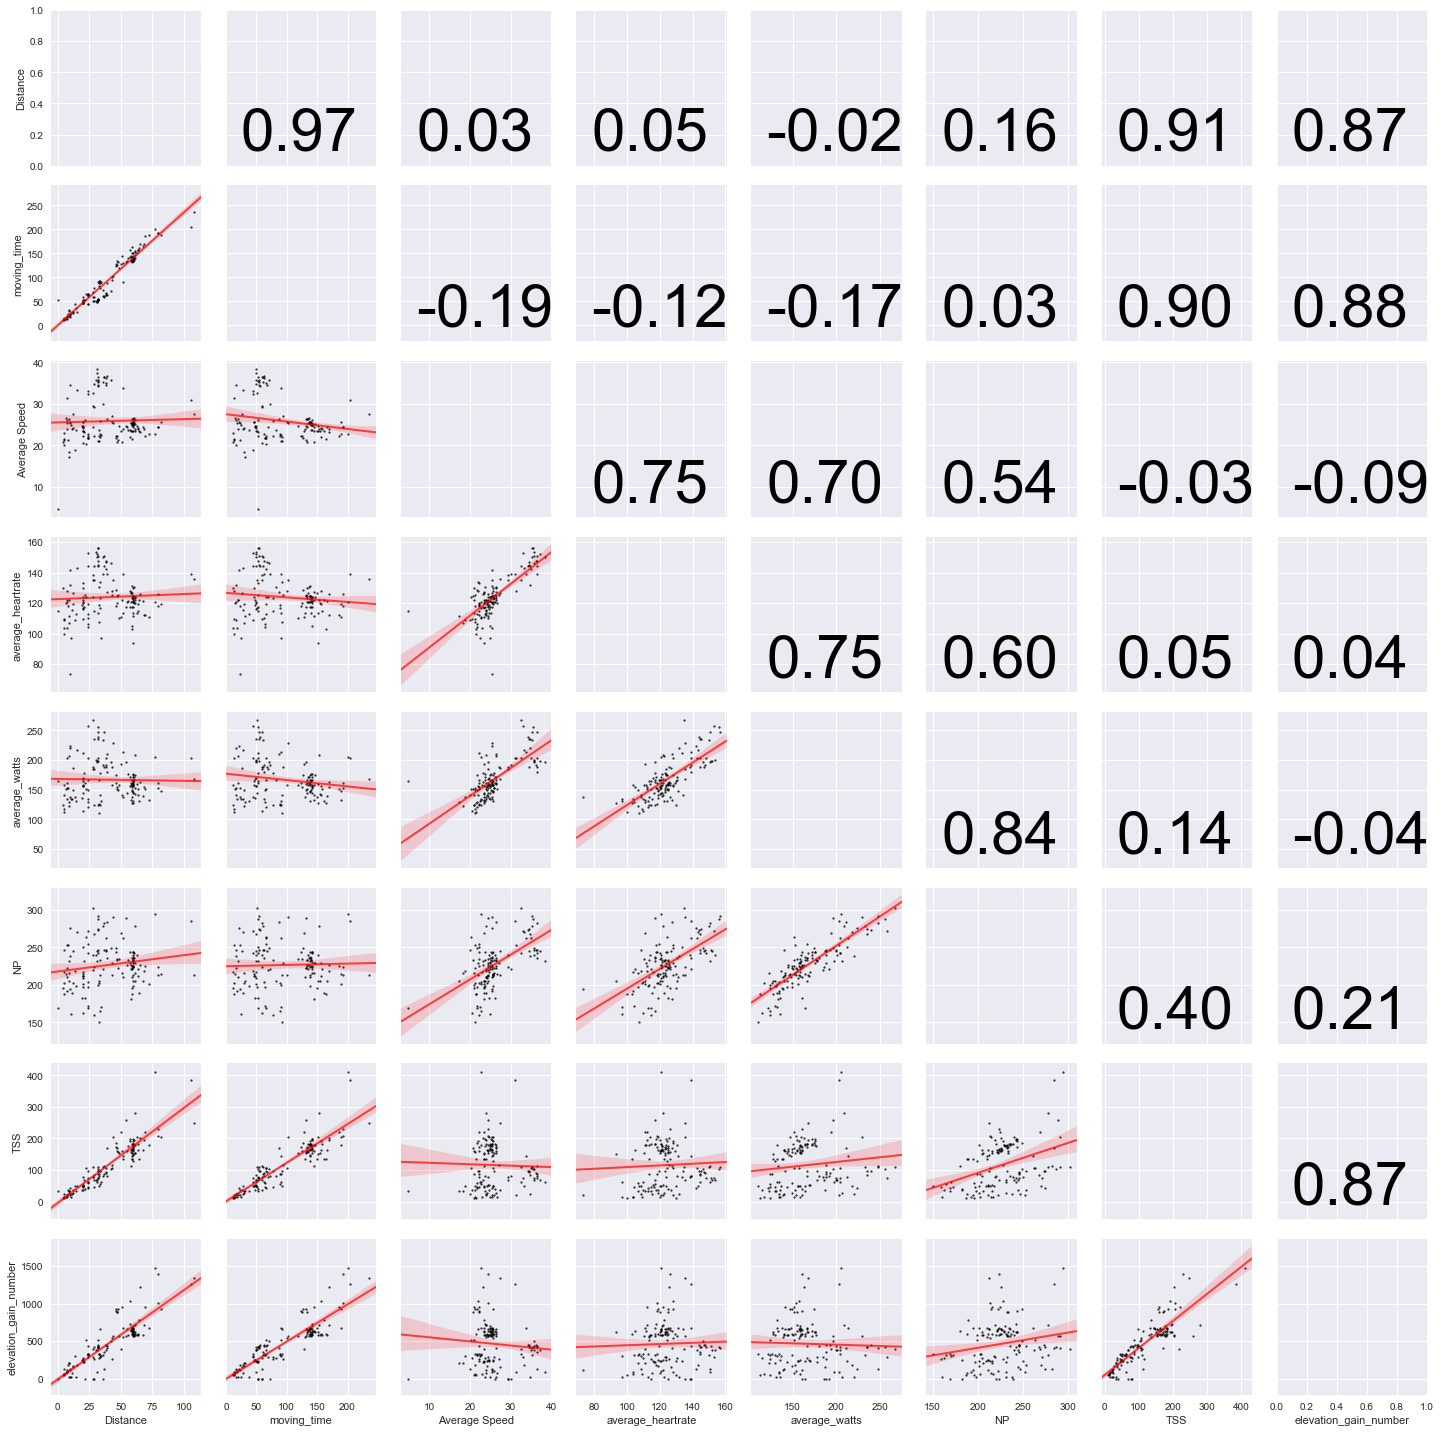

In [9]:
# Extracting the columns that are going to be analysed

result_true['elevation_gain_number'] = result_true['elevation_gain'].str.extract('(\\d+)').astype(int)
analyze = result_true[['Distance', 'moving_time', 'Average Speed', 'average_heartrate', 'average_watts', 'NP', 'TSS', 'elevation_gain_number']]

# Define the correlation coefficient function
from scipy.stats import pearsonr
def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.text(0.1, 0.1, "{0:.2f}".format(r),
        transform=ax.transAxes,
        color='black', fontsize=60)

# Plotting the scatter plot and the correlation coefficient
g = sns.PairGrid(analyze)
g.map_lower(sns.regplot, color="0",line_kws={"color":"r","alpha":0.7,"lw":2}, scatter_kws={'s':5})
g.map_upper(corrfunc)

The scatter plot pictures how each variables interact. For example in the first scatter plot which is between the __moving_time__ and __Distance__, we can see as the __Distance__ increasing the __moving_time__ is also increasing, therefore they have a positive correlation as they move the same.

In the diagrams above, the correlation coefficients are also shown, we can easily analyse the realationship between the variables based on the number. A correlation coefficient of 1 is total high positive correlation, -1 is total negative correlation, and 0 represents no correlation.
- Positive coefficient meaning that the variables is increasing or decreasing as the other variable is.
- Negative coefficient meaning that the variable react oppositely from the other variable (If the first variable is increasing, then the second variable is decreasing, vice versa).
- The bigger the positive number (max 1) or the smaller the negative number (max -1), the more correlated the variables are.

From the information and diagram above, it can be concluded that these are __the variables with high correlation__ (correlation above 0.50 or below -0.50):
- Distance and Moving time (coef = 0.97)
- Distance and TSS (coef = 0.91)
- Distance and Elevation Gain (coef = 0.87)
- Moving Time and TSS (coef = 0.90)
- Moving Time and Elevation Gain (coef = 0.88)
- Average Speed and Average Heart Rate (coef = 0.75)
- Average Speed and Average Power (coef = 0.70)
- Average Speed and NP (coef = 0.54)
- Average Heart Rate and Average Power (coef = 0.75)
- Average Heart Rate and NP (coef = 0.60)
- Average Power and NP (coef = 0.84)
- TSS and Elevation Gain (coef = 0.87)

### #4 Analyse Differences Between These Categories: Ride, Workout, and Ride
We want to explore the differences between the three categories: Race, Workout and Ride.
- Use scatter plots with different colours for each category to explore how these categories differ.
- Use histograms or box plots to visualise the different distributions of a variable for the three categories.
- In both cases, experiment with different variables but only include those that are interesting in your final notebook (if none are interesting, show us a representative example).

In [10]:
# Make a new dataset for the key variables to be observed later
differences = result_true[['workout_type', 'elapsed_time',  'Distance', 'average_temp', 'moving_time', 'Average Speed', 'average_heartrate', 'average_watts', 'NP', 'TSS', 'elevation_gain_number', 'Calories (HR)']]

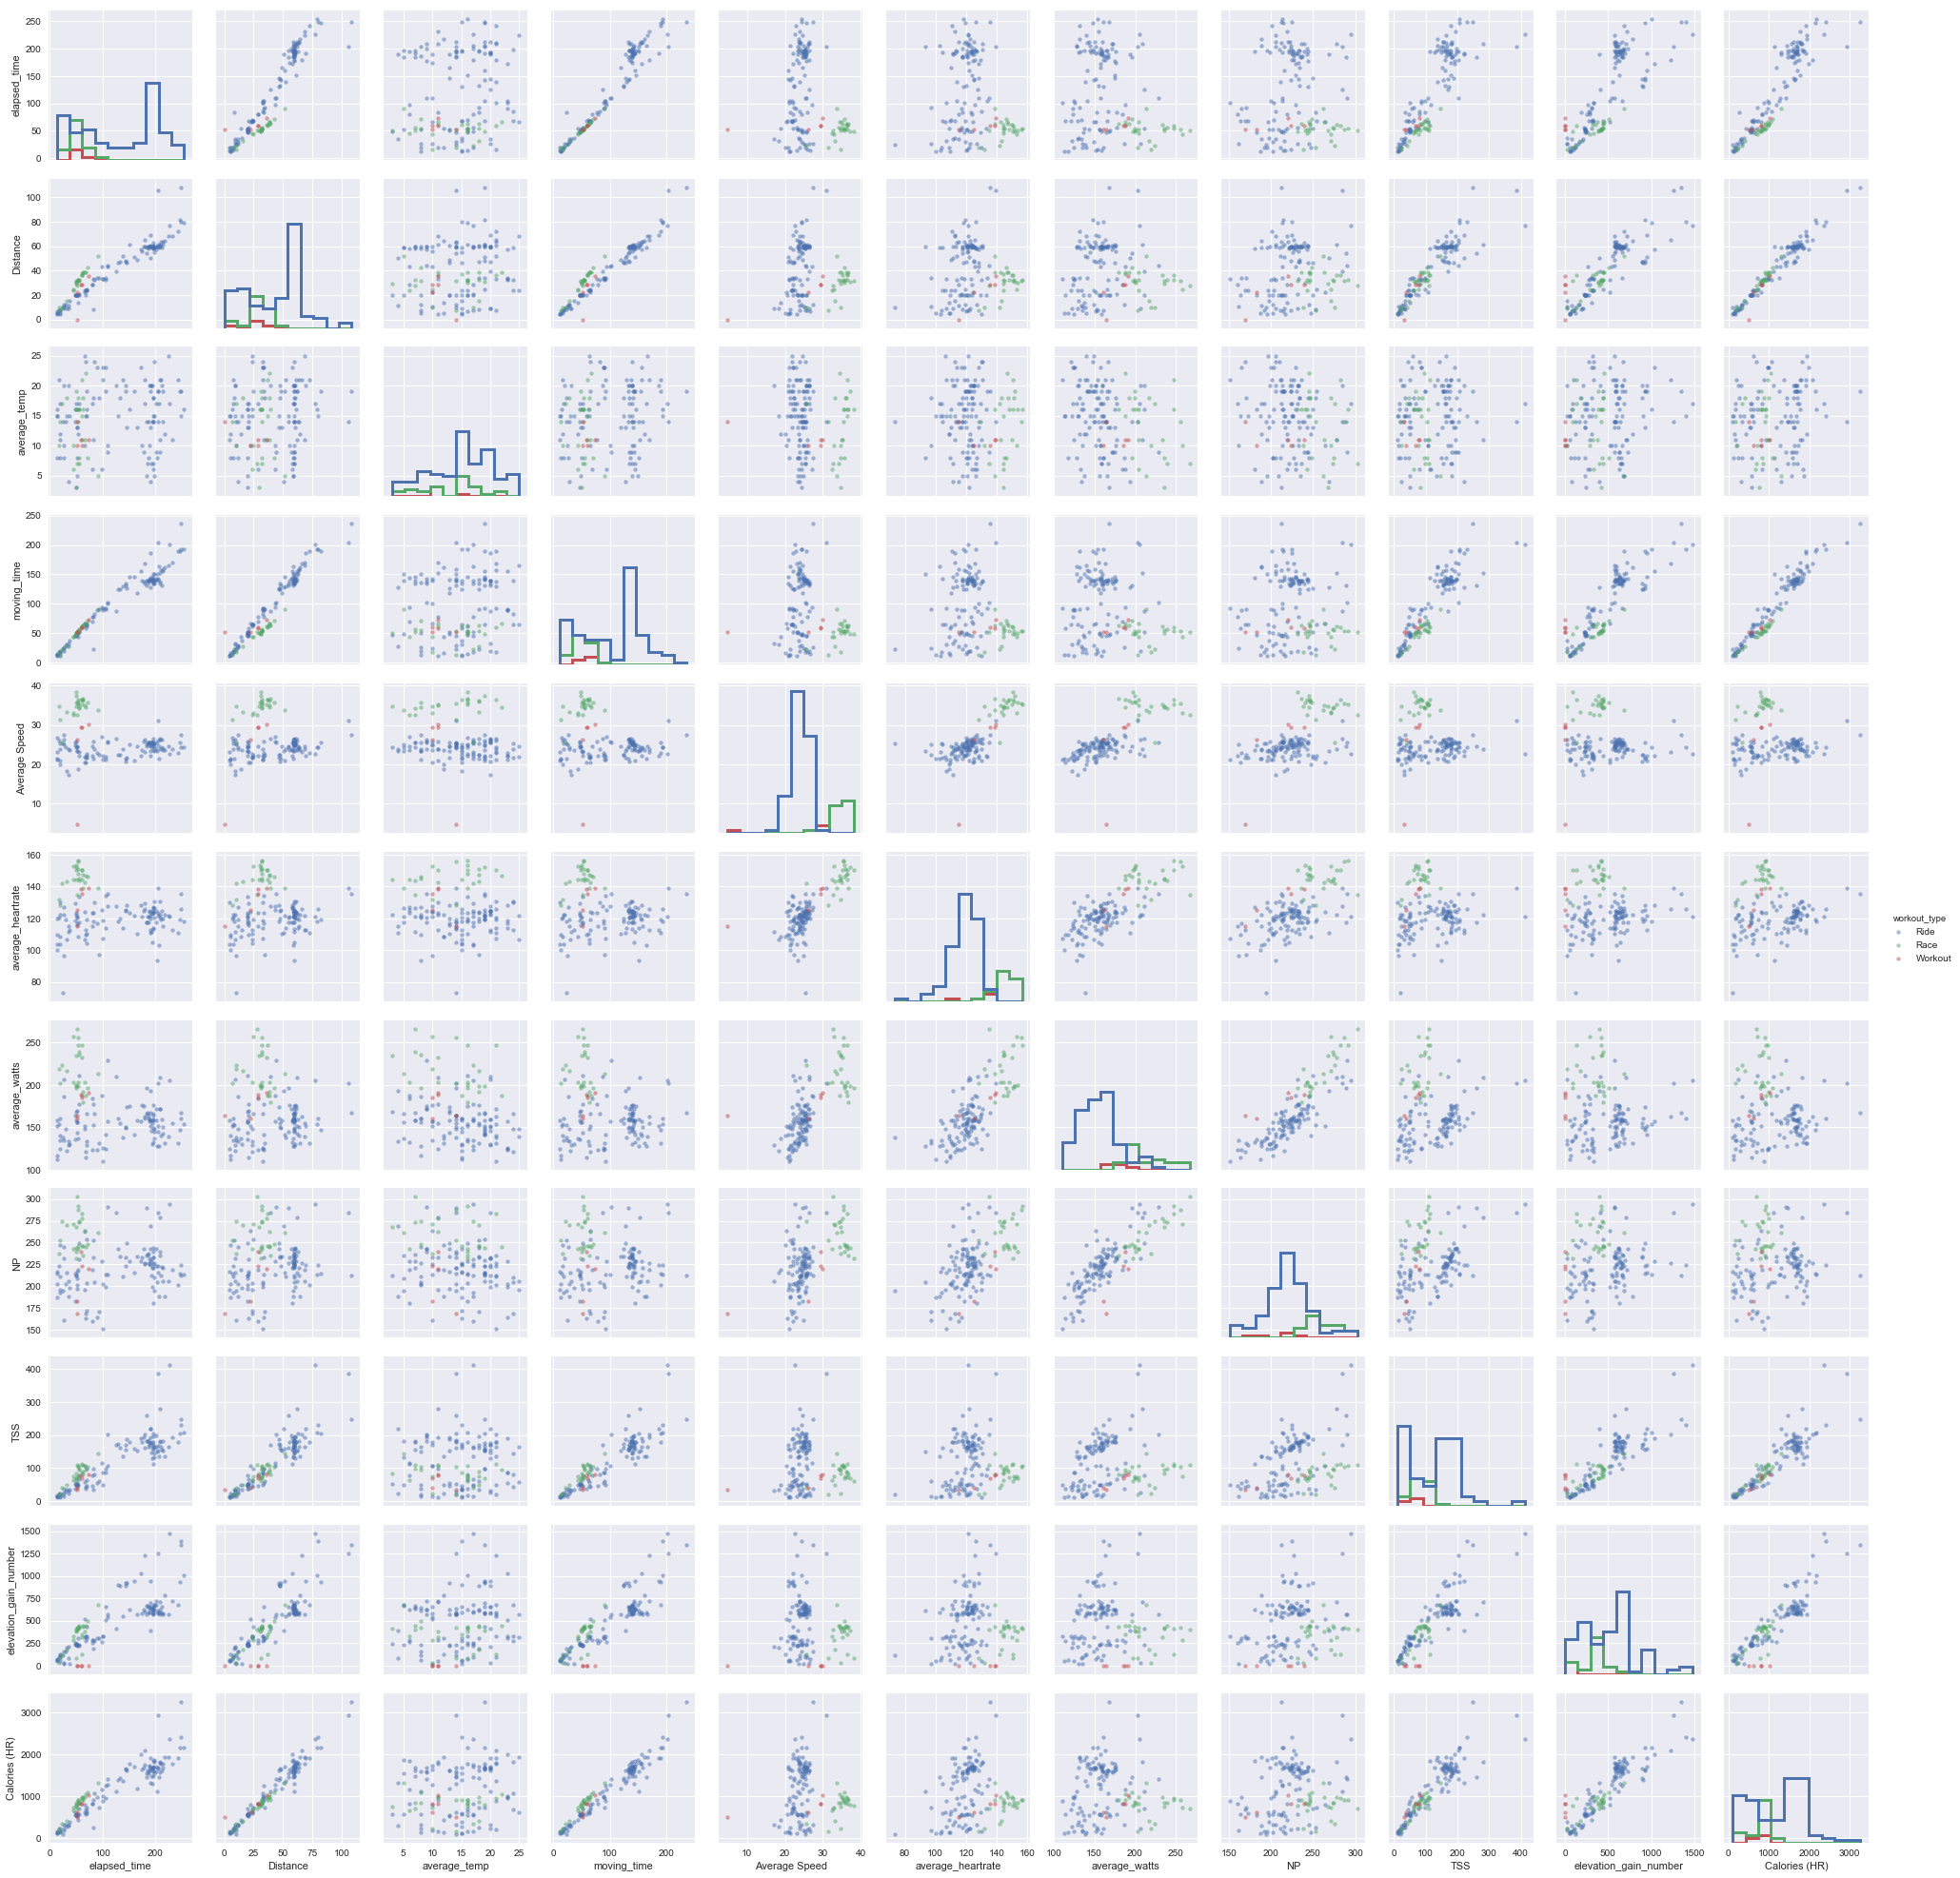

In [20]:
# To have a quick analysis using a PairGrid for the key variables
g = sns.PairGrid(differences, hue="workout_type")
g = g.map_diag(plt.hist, histtype='step', lw=3)
g = g.map_offdiag(plt.scatter, s=15, alpha=0.5)
g = g.add_legend()

#Saving figure to a file so it can be clearly seen in the pdf file
g.savefig('plot/Portofolio 1 plot.pdf')

We don't have the same amount of data for each category therefore there might be a bias in the analysis, in fact there is only 5 data for the workout category.
But here is the analysis from the histogram and scatter plot above:
- Distribution analysis:
	* The workout and race has a fewer __elapsed time__, closer __distance__, fewer __moving time__, less __TSS__, less __elevation gain__, and fewer __calories__, while the Ride category tends to have a wider range in those features.
	* The race category tends to have a faster __Average Speed__, __Average Heart Rate__, __Average Power (average_watts)__, and __Normalised Power(NP)__ than the other category. 
    * The workout category has a low __elevation number__ if compared to other category


- Correlation analysis:
    * There is not much different among the categories, most of the correlations are the pretty much the same, but there might be a slight differences in some variables below:
        - Between __NP__ and __TSS__ :Work category has a really high correlation, then followed bu the Ride category, while the Race category has the lowest correlation
        - Between __average_heartrate__ and __average_watts__= There is somewhat a strong relationship on the Ride category, but low correlation in the Race category, and a really high correlation in the workout category.
        - Between __Calories__ and __average_watts__: It can be seen that the Race category has a negative correlation while the Ride has a positive correlation, and the workout has a higher positive correlation 

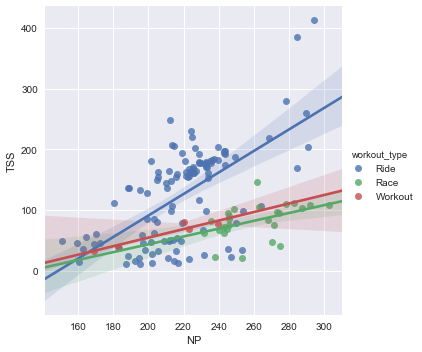

In [49]:
# Correlation between NP and TSS
gr = sns.lmplot(x="NP", y="TSS", hue="workout_type", data=result_true)

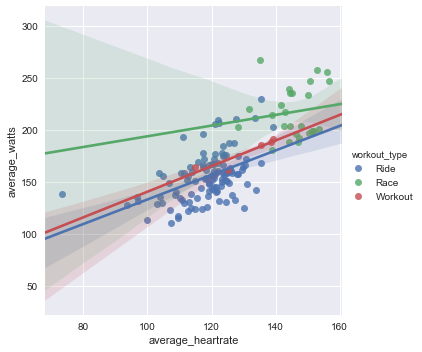

In [50]:
# Correlation between average_heartrate and average_watts
gr = sns.lmplot(x="average_heartrate", y="average_watts", hue="workout_type", data=result_true)

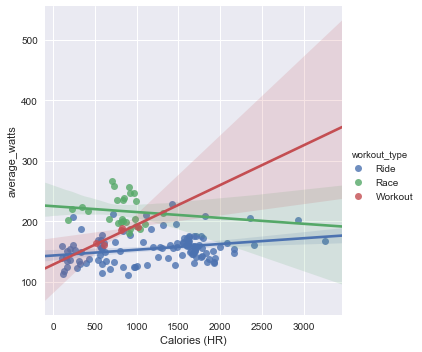

In [51]:
# Correlation between Calories and average_watts
gr = sns.lmplot(x="Calories (HR)", y="average_watts", hue="workout_type", data=result_true)

## CHALLENGE

## #1 Challenge: What leads more kudos?

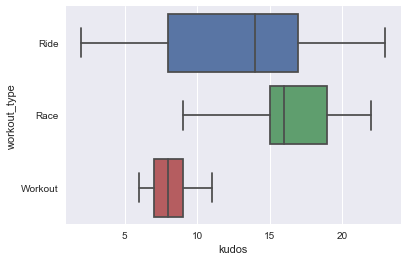

In [52]:
sns.boxplot(data=result_true, x='kudos', y='workout_type')

In [73]:
race = result_true.loc[result_true['workout_type'] == 'Race']
workout = result_true.loc[result_true['workout_type'] == 'Workout']
ride = result_true.loc[result_true['workout_type'] == 'Ride']
print ("Ride mean", ride["kudos"].mean())
print ("Race mean", race["kudos"].mean())
print ("Workout mean", workout["kudos"].mean())

Ride mean 12.398230088495575
Race mean 16.192307692307693
Workout mean 8.2


From the box plot and mean above, it can be conclude that the __race__ category __gains highest kudos__ followed by Ride then the least is Workout

In [ ]:
'workout_type', 'elapsed_time',  'Distance', 'average_temp', 'moving_time', 'Average Speed', 'average_heartrate', 'average_watts', 'NP', 'TSS', 'elevation_gain_number', 'Calories (HR)'

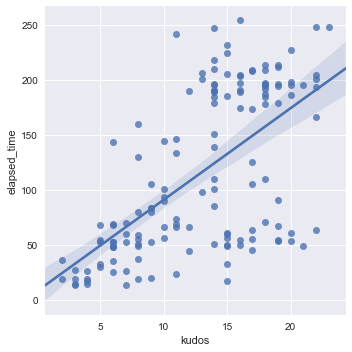

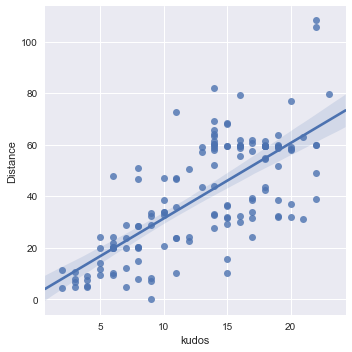

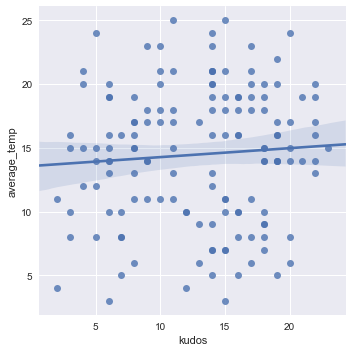

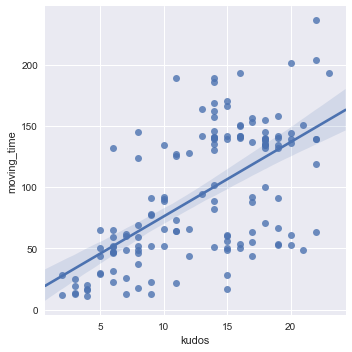

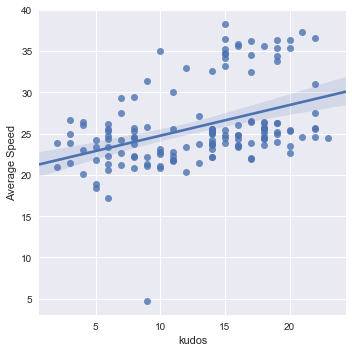

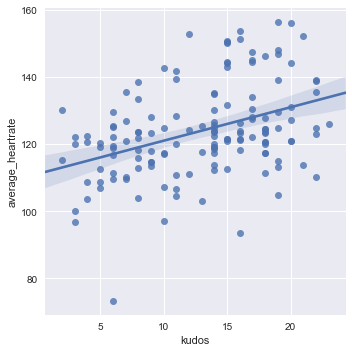

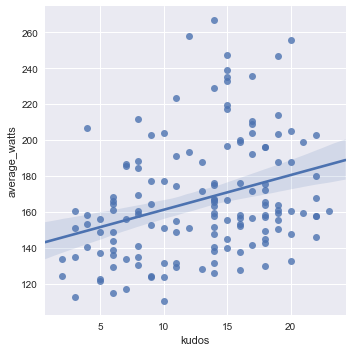

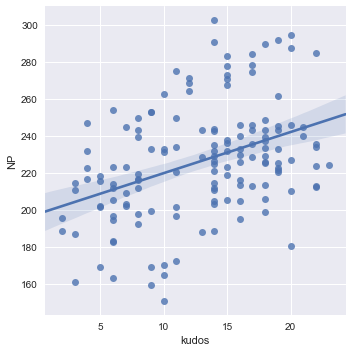

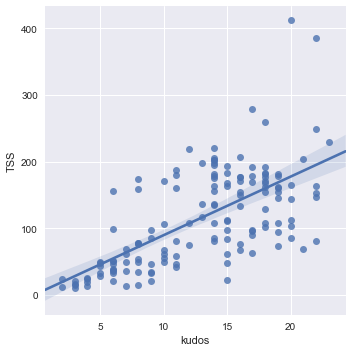

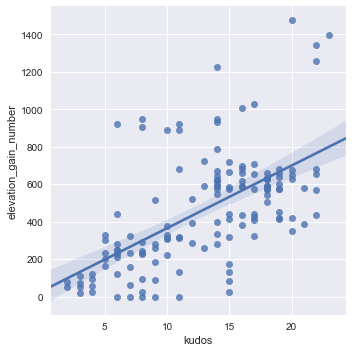

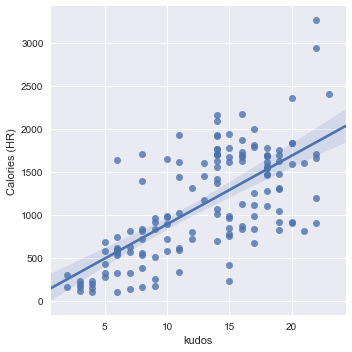

In [88]:
sns.lmplot(x="kudos", y="elapsed_time", data=result_true)
sns.lmplot(x="kudos", y="Distance", data=result_true)
sns.lmplot(x="kudos", y="average_temp", data=result_true)
sns.lmplot(x="kudos", y="moving_time", data=result_true)
sns.lmplot(x="kudos", y="Average Speed", data=result_true)
sns.lmplot(x="kudos", y="average_heartrate", data=result_true)
sns.lmplot(x="kudos", y="average_watts", data=result_true)
sns.lmplot(x="kudos", y="NP", data=result_true)
sns.lmplot(x="kudos", y="TSS", data=result_true)
sns.lmplot(x="kudos", y="elevation_gain_number", data=result_true)
sns.lmplot(x="kudos", y="Calories (HR)", data=result_true)

From the scatter diagram above it can bee seen that some kudos have a positive relationship with these variables:
- elapsed_time
- Distance
- moving_time
- Average Speed
- NP
- TSS
- Elevation gain
- Calories (HR)
As the number of those variables increases, the kudos tends to increase as well.

While in the other categories, it does not seems to be really significant